In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [6]:
results_path = '../src_results/1.csv'
if not os.path.exists(results_path):
    print(f"Error: File {results_path} not found. Run the C++ benchmark first!")
else:
    print("Data file found. Loading...")

Data file found. Loading...


In [7]:
df = pd.read_csv(results_path)

# Находим базовое время (1 поток) для каждого метода и размера
base_times = df[df['Threads'] == 1][['Method', 'Size', 'Time']].rename(columns={'Time': 'BaseTime'})
df = pd.merge(df, base_times, on=['Method', 'Size'], how='left')

df['Time_ms'] = df['Time'] * 1000
df['Speedup'] = df['BaseTime'] / df['Time']
df['Efficiency'] = df['Speedup'] / df['Threads']

sizes = sorted(df['Size'].unique())
threads = sorted(df['Threads'].unique())
methods = ['NoReduction', 'Reduction'] 

plot_configs = [
    ('Time_ms',    'Time (ms)',   'Time vs Threads'),
    ('Speedup',    'Speedup',     'Speedup vs Threads'),
    ('Efficiency', 'Efficiency',  'Efficiency vs Threads')
]
display(df.head(10))

,Method,Size,Threads,Time,Result,BaseTime,Time_ms,Speedup,Efficiency
0,NoReduction,1000000,1,0.020739,51,0.020739,20.7386,1.000000,1.000000
1,Reduction,1000000,1,0.008733,51,0.008733,8.7326,1.000000,1.000000
2,NoReduction,1000000,2,0.004596,51,0.020739,4.5963,4.512021,2.256010
3,Reduction,1000000,2,0.003845,51,0.008733,3.8446,2.271394,1.135697
4,NoReduction,1000000,4,0.002910,51,0.020739,2.9104,7.125687,1.781422
5,Reduction,1000000,4,0.001992,51,0.008733,1.9917,4.384496,1.096124
6,NoReduction,1000000,8,0.002098,51,0.020739,2.0984,9.883054,1.235382
7,Reduction,1000000,8,0.000975,51,0.008733,0.9750,8.956513,1.119564
8,NoReduction,1000000,12,0.002322,51,0.020739,2.3221,8.930968,0.744247
9,Reduction,1000000,12,0.001679,51,0.008733,1.6791,5.200762,0.433397


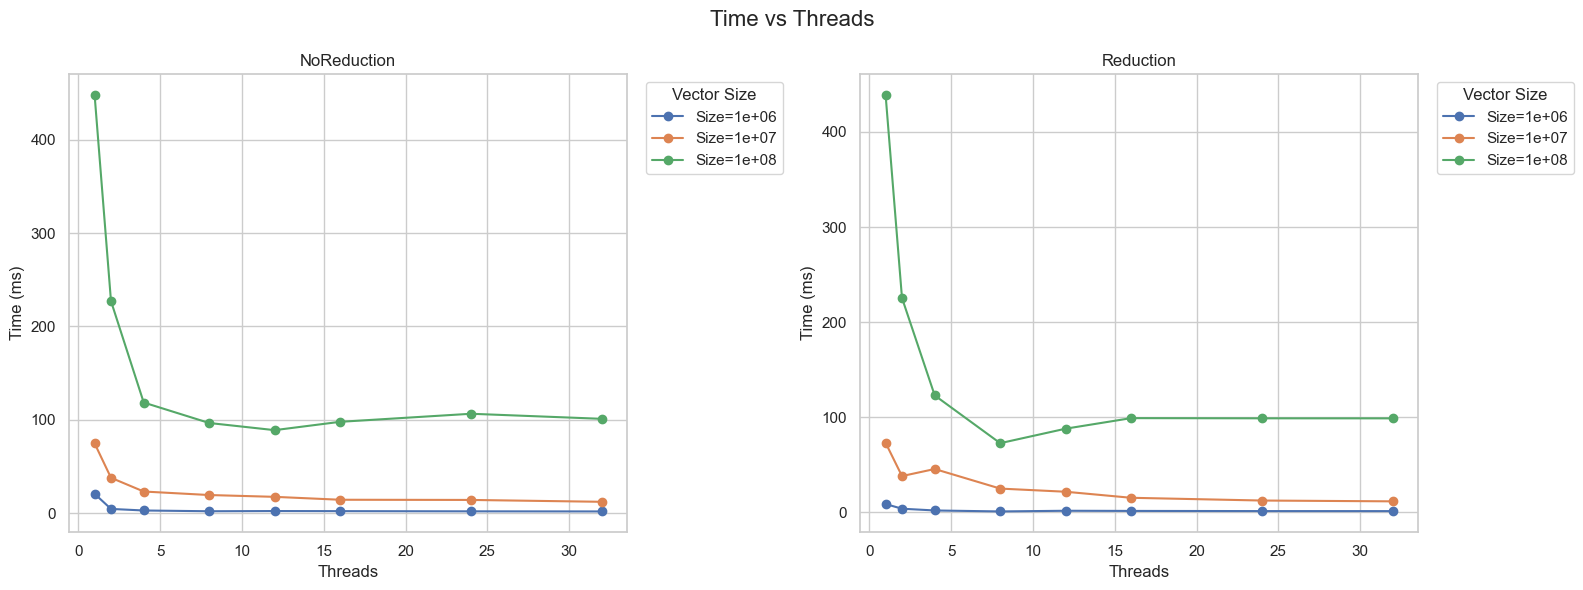

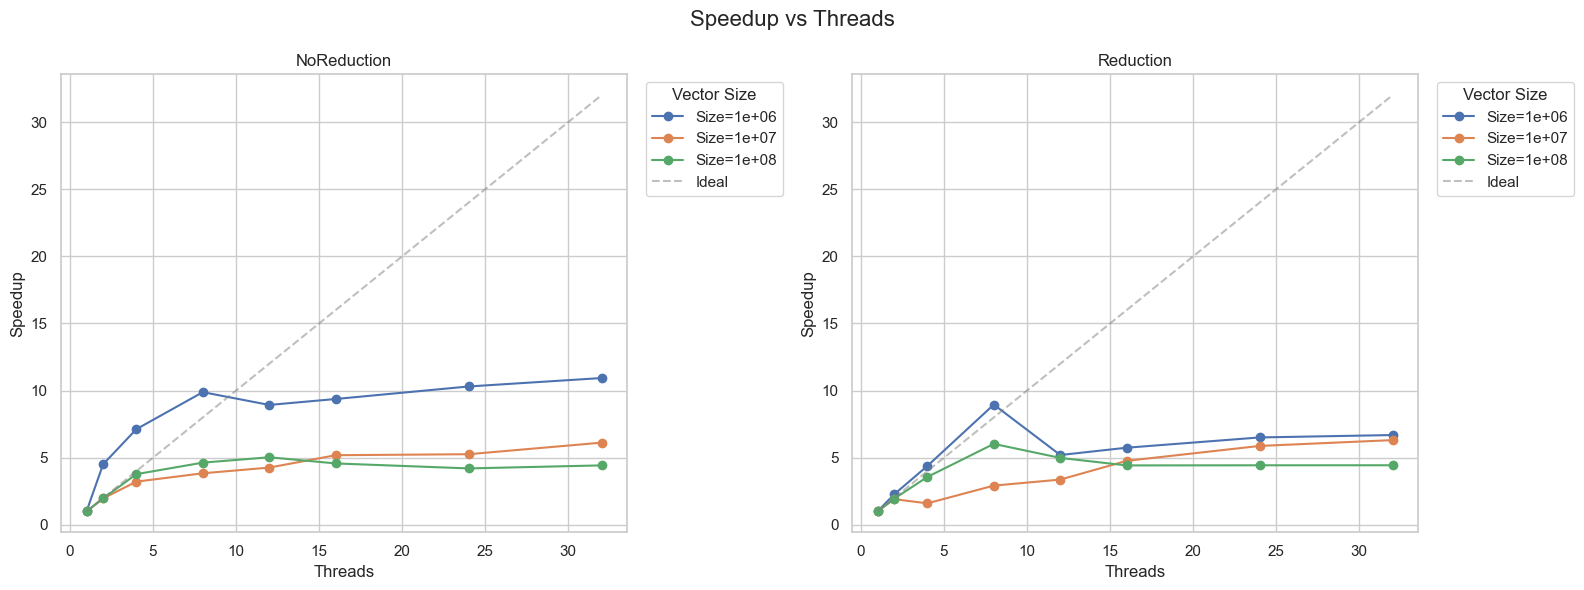

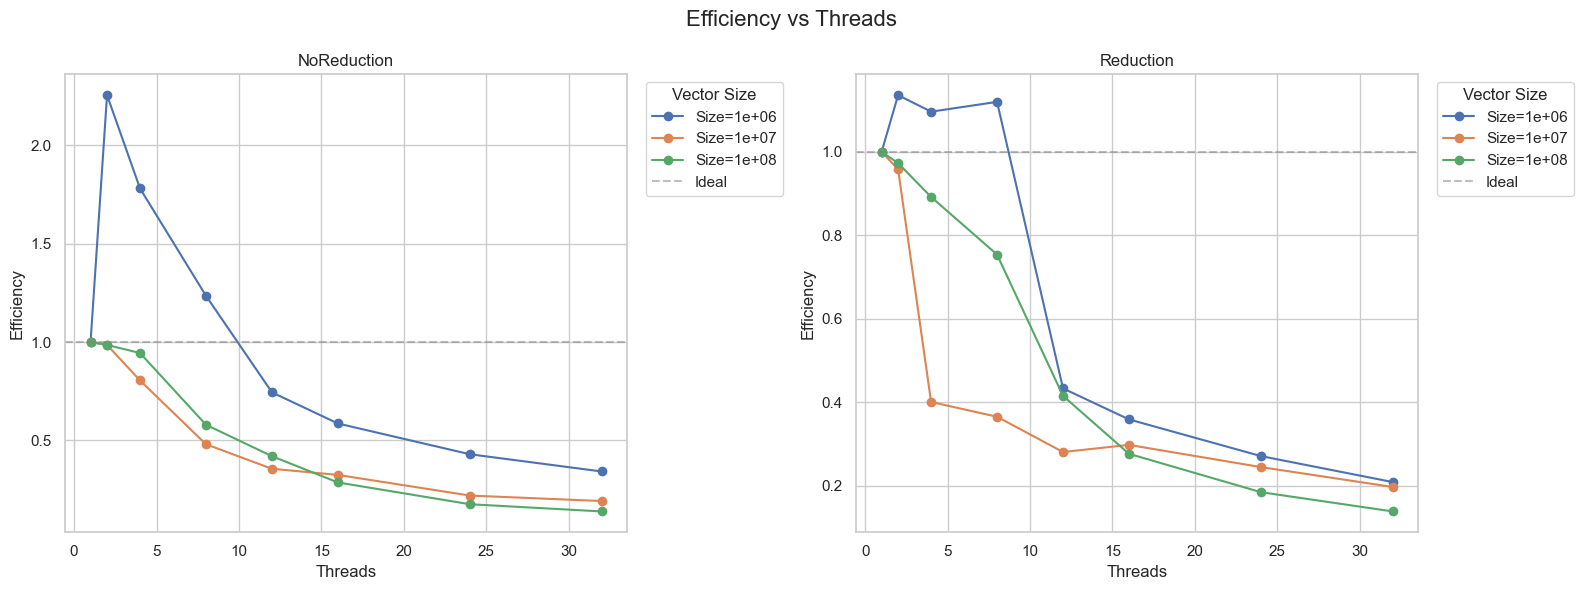

In [8]:
# --- ПОСТРОЕНИЕ ГРАФИКОВ ---
for col_name, ylabel, title in plot_configs:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    
    # Цикл по методам (axes[0] -> NoReduction, axes[1] -> Reduction)
    for ax, method in zip(axes, methods):
        subset_method = df[df['Method'] == method]
        
        for s in sizes:
            subset_size = subset_method[subset_method['Size'] == s].sort_values('Threads')
            ax.plot(subset_size['Threads'], subset_size[col_name], marker='o', label=f'Size={s:.0e}')
        
        if col_name == 'Speedup':
            max_th = df['Threads'].max()
            ax.plot([1, max_th], [1, max_th], '--', color='gray', alpha=0.5, label='Ideal')
        
        elif col_name == 'Efficiency':
            ax.axhline(1.0, linestyle='--', color='gray', alpha=0.5, label='Ideal')

        ax.set_title(f'{method}')
        ax.set_xlabel('Threads')
        ax.set_ylabel(ylabel)
        ax.grid(True)
        ax.legend(title='Vector Size', bbox_to_anchor=(1.02, 1), loc='upper left')

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()